## A first attempt at identifying Medicare provider fraud.

This notebook makes use of a [Kaggle notebook by  Rajesh Sharma](https://www.kaggle.com/code/rajesh2609/medicare-provider-fraud-detection#Data-Seggregation)

In [1]:
# imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
# Setting aesthetics and Panda's display options
pd.set_option('display.max_columns',90)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

## Machine Learning

### Preparation of the data for model building

#### Data loading

- Loading of data
- First look (head and columns)

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/EY-Tech-Consulting-Denmark/Graphathon-ATP/main/Data/clean_data/data.csv")
data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Age,IsDead,DaysAdmitted,DaysClaimLasted,ClaimEndAfterDischarged,TotalDiagnosis,TotalProcedures,TotalPhysicians
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1,66.0,0,7,7,0,9,0,1
1,BENE17521,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,1,95.0,0,13,13,0,9,2,3
2,BENE21718,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,1,87.0,0,19,19,0,9,1,2
3,BENE22934,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,1,79.0,0,5,5,0,7,1,3
4,BENE24402,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,1,83.0,0,5,5,0,1,1,2


In [5]:
data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

#### Features and target split

In this section, master data table is created by aggregating information on Provider level. 

The features in master table will be used to create a classification model.

In [6]:
# Number of distinct Providers. Used to verify data integrity.
data["Provider"].nunique()

2092

#### Step 1. 
Initial aggregation of Provider and target variable. 
Adding number of claims as feature

In [7]:
aggregate_data = pd.DataFrame(data.groupby(['Provider','PotentialFraud'])['ClaimID'].count()).reset_index()
aggregate_data.columns = ['Provider','PotentialFraud','NumbClaimIDs']
aggregate_data

,Provider,PotentialFraud,NumbClaimIDs
0,PRV51001,0,5
1,PRV51003,1,62
2,PRV51007,0,3
3,PRV51008,0,2
4,PRV51011,0,1
...,...,...,...
2087,PRV57719,0,4
2088,PRV57728,0,1
2089,PRV57729,0,11
2090,PRV57732,0,11


   PotentialFraud
0            1652
1             440 



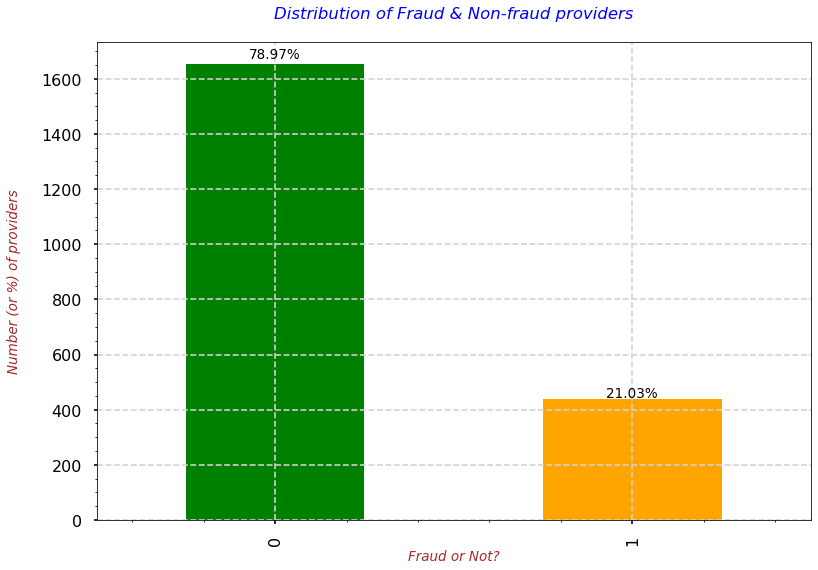

In [8]:
print(pd.DataFrame(aggregate_data['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = aggregate_data['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/aggregate_data.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of providers\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

#### Step 2.
Adding mean of IsDead,  Age,  DaysAdmitted,  DaysClaimLasted,  TotalPhysicians,  RenalDiseaseIndicator,  IPAnnualReimbursementAmt,  IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt

In [9]:
tmp = pd.DataFrame(data.groupby(['Provider','PotentialFraud'])['IsDead','Age','DaysAdmitted','DaysClaimLasted','TotalPhysicians','RenalDiseaseIndicator','IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'].mean()).reset_index()
aggregate_data = aggregate_data.merge(tmp,on=['Provider','PotentialFraud'])
aggregate_data

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Provider,PotentialFraud,NumbClaimIDs,IsDead,Age,DaysAdmitted,DaysClaimLasted,TotalPhysicians,RenalDiseaseIndicator,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,0,5,0.000000,77.800000,6.000000,6.000000,1.600000,0.400000,77902.000000,2563.200000,1350.000000,236.000000
1,PRV51003,1,62,0.016129,70.370968,6.161290,6.161290,1.645161,0.274194,12696.612903,1604.064516,2217.741935,724.838710
2,PRV51007,0,3,0.000000,78.000000,6.333333,6.333333,1.333333,0.333333,11710.000000,2136.000000,2413.333333,470.000000
3,PRV51008,0,2,0.000000,51.000000,5.000000,5.000000,2.000000,0.000000,18750.000000,1602.000000,320.000000,165.000000
4,PRV51011,0,1,0.000000,98.000000,6.000000,6.000000,1.000000,1.000000,5000.000000,1068.000000,590.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,PRV57719,0,4,0.000000,65.500000,14.750000,14.750000,1.750000,0.250000,25210.000000,2352.000000,847.500000,470.000000
2088,PRV57728,0,1,0.000000,86.000000,5.000000,5.000000,2.000000,0.000000,6000.000000,1068.000000,50.000000,0.000000
2089,PRV57729,0,11,0.000000,74.090909,6.545455,6.545455,1.636364,0.272727,17073.636364,2233.090909,1402.727273,333.636364
2090,PRV57732,0,11,0.000000,71.363636,6.272727,6.272727,2.000000,0.272727,14375.454545,1650.545455,2216.363636,682.727273


#### Step 3. 
Adding number of distinct Sates and Counties.

In [10]:
tmp = pd.DataFrame(data.groupby(['Provider','PotentialFraud'])['State','County'].nunique()).reset_index()
aggregate_data = aggregate_data.merge(tmp,on=['Provider','PotentialFraud'])
aggregate_data

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Provider,PotentialFraud,NumbClaimIDs,IsDead,Age,DaysAdmitted,DaysClaimLasted,TotalPhysicians,RenalDiseaseIndicator,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,State,County
0,PRV51001,0,5,0.000000,77.800000,6.000000,6.000000,1.600000,0.400000,77902.000000,2563.200000,1350.000000,236.000000,1,2
1,PRV51003,1,62,0.016129,70.370968,6.161290,6.161290,1.645161,0.274194,12696.612903,1604.064516,2217.741935,724.838710,3,13
2,PRV51007,0,3,0.000000,78.000000,6.333333,6.333333,1.333333,0.333333,11710.000000,2136.000000,2413.333333,470.000000,1,1
3,PRV51008,0,2,0.000000,51.000000,5.000000,5.000000,2.000000,0.000000,18750.000000,1602.000000,320.000000,165.000000,1,1
4,PRV51011,0,1,0.000000,98.000000,6.000000,6.000000,1.000000,1.000000,5000.000000,1068.000000,590.000000,90.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,PRV57719,0,4,0.000000,65.500000,14.750000,14.750000,1.750000,0.250000,25210.000000,2352.000000,847.500000,470.000000,1,3
2088,PRV57728,0,1,0.000000,86.000000,5.000000,5.000000,2.000000,0.000000,6000.000000,1068.000000,50.000000,0.000000,1,1
2089,PRV57729,0,11,0.000000,74.090909,6.545455,6.545455,1.636364,0.272727,17073.636364,2233.090909,1402.727273,333.636364,1,6
2090,PRV57732,0,11,0.000000,71.363636,6.272727,6.272727,2.000000,0.272727,14375.454545,1650.545455,2216.363636,682.727273,1,4


#### Train-test split

In [29]:
X = aggregate_data[['IsDead','Age','DaysAdmitted','DaysClaimLasted','TotalPhysicians','RenalDiseaseIndicator','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','State','County']]
y = aggregate_data[['PotentialFraud']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.3, 
                                                random_state=1,
                                                stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

### Model building

In [32]:
clf = RandomForestClassifier(random_state=42).fit(X_train, np.array(y_train['PotentialFraud']))

##### Model evaluation

In [35]:
actual = np.array(y_test['PotentialFraud'])
pred = np.array(clf.predict(X_test))

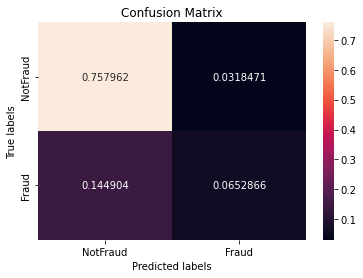

In [36]:
conf_matrix = metrics.confusion_matrix(y_test,pred)
conf_matrix=conf_matrix/pred.size
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NotFraud', 'Fraud']); ax.yaxis.set_ticklabels(['NotFraud', 'Fraud']);

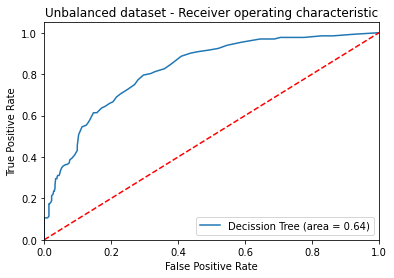

f1 score: 0.6602245087956171
AUC: 0.6351417399804496


In [44]:
logit_roc_auc = metrics.roc_auc_score(y_test, pred)
y_pred_prob=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decission Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

print(f'f1 score: {metrics.f1_score(y_test, pred, average="macro")}')
print(f'AUC: {logit_roc_auc}')

### Model building utilizing graph features

### Conclusion